# Exam 2 (Draft)
### Author: 
#### Dominic L Perez

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Flights Data
flight_file_name = 'flights'
flight_file_location = 'https://joannabieri.com/introdatascience/data/'+flight_file_name+'.csv'

In [3]:
#Weather Data 
weather_file_name = 'weather'
weather_file_location = 'https://joannabieri.com/introdatascience/data/'+weather_file_name+'.csv'

In [4]:
#Planes Data
planes_file_name = 'planes'
planes_file_location = 'https://joannabieri.com/introdatascience/data/'+planes_file_name+'.csv'

In [5]:
#Airports Data
airports_file_name = 'airports'
airports_file_location = 'https://joannabieri.com/introdatascience/data/'+airports_file_name+'.csv'

In [6]:
#Airlines Data
airlines_file_name = 'airlines'
airlines_file_location = 'https://joannabieri.com/introdatascience/data/'+airlines_file_name+'.csv'

In [7]:
# Load flights data.
df_flights = pd.read_csv(flight_file_location)
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 10:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 11:00:00


# P. Preliminaries(5 points)

In [8]:
#Shows how many observations and variables there are.
print(df_flights.shape[0],'observations')
print(df_flights.shape[1],'variables')

336776 observations
19 variables


In [9]:
#Brief overview of the data types and variable.
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  float64
 16  hour            336776 non-null  float64
 17  minute    

|Data Variable Name|Categorical or Numerical|Data Type|
|------------------|-----------|---------|
|year|Numerical|int64|
|month|Numerical|int64|
|day|Numerical|int64|
|dep_time|Numerical|float64|
|sched_dep_time|Numerical|int64|
|dep_delay|Numerical|float64|
|arr_time|Numerical|float64|
|sched_arr_time|Numerical|int64|
|arr_delay|Numerical|float64|
|carrier|Categorical|object|
|flight|Numerical|int64|
|tailnum|Categorical|object|
|origin|Categorical|object|
|dest|Categorical|object|
|air_time|Numerical|float64|
|distance|Numerical|float64|
|hour|Numerical|float64|
|minute|Numerical|float64|
|time_hour|Categorical|object|

In [10]:
#Shows how many missing values there are for each column. 
missing_data = df_flights.isnull()
for columns in missing_data.columns.values.tolist():
   print(missing_data[columns].value_counts())
   print('')

year
False    336776
Name: count, dtype: int64

month
False    336776
Name: count, dtype: int64

day
False    336776
Name: count, dtype: int64

dep_time
False    328521
True       8255
Name: count, dtype: int64

sched_dep_time
False    336776
Name: count, dtype: int64

dep_delay
False    328521
True       8255
Name: count, dtype: int64

arr_time
False    328063
True       8713
Name: count, dtype: int64

sched_arr_time
False    336776
Name: count, dtype: int64

arr_delay
False    327346
True       9430
Name: count, dtype: int64

carrier
False    336776
Name: count, dtype: int64

flight
False    336776
Name: count, dtype: int64

tailnum
False    334264
True       2512
Name: count, dtype: int64

origin
False    336776
Name: count, dtype: int64

dest
False    336776
Name: count, dtype: int64

air_time
False    327346
True       9430
Name: count, dtype: int64

distance
False    336776
Name: count, dtype: int64

hour
False    336776
Name: count, dtype: int64

minute
False    336776
Name: cou

# 1. Question 1 (5 points)
What are the ten most common destinations for flights from NYC airports in 2013?

Make a table (Data Frame) that lists these in descending order of frequency and shows the number of flights heading to each airport.

Hint: You can use the airports dataset to look up the airport name based on dest code. This is the ‘faa’ code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.

In [11]:
# Insert code here
#Note: This dataset ONLY contains 2013 data, no need to condition.
#Note: EWR, LGA, JFK are the only origin airports and all reside in NYC, 
#      no need to condition.
top10_dest = df_flights['dest'].value_counts().head(10)
pd.DataFrame(top10_dest).rename(columns = {'count':'flights'})

,flights
dest,
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


Above is a list of the top ten most visited airports from NYC. We can see the **most visited airport** from NYC is the **Chicago O'Hare International airport(ORD)**, followed closely by the Hartsfield-Jackson Atlanta International Airport(ATL). On the westcoast, the 
Los Angeles International Airport(LAX) is third.  

# 2. Question 2 (5 points)
Which airlines have the most flights departing from NYC airports in 2013?

Make a table(Data Frame) that lists these in descending order of frequency and shows the number of flights for each airline. In your narrative mention the names of the airlines as well.

Hint: You can use the airlines dataset to look up the airline name based on carrier code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.

In [12]:
# Insert code here
#Note: This dataset ONLY contains 2013 data, no need to condition.
#Note: All origin airports reside in NYC, no need to condition.
top10_carrier = df_flights['carrier'].value_counts().head(5)
pd.DataFrame(top10_carrier).rename(columns = {'count':'flights'})

,flights
carrier,
UA,58665
B6,54635
EV,54173
DL,48110
AA,32729


The list above shows the top ten most flown airlines from NYC airports. The **most flown airline** from NYC is **United Airlines(UA)**. Second is JetBlue Airways(B6), which is followed closely by ExpressJet Airlines(EV).

# 3. Question 3 (10 points)
Consider only flights that have non-missing arrival delay information and answer the questions below. Your answer should include the name of the carrier in addition to the carrier code and the values asked.

Hint: The easiest way to do this is replace the NaNs in just the ‘arr_delay’ column with some other string, like ‘NA’ and then create a mask, but you could also use some of the more fancy na tools.

In [13]:
# Selecting rows with non_missing arival delay data and placing in new df
dfQ3 = df_flights[['arr_delay','carrier']].dropna()
dfQ3.head() #Note: Negative values indicate early arrival.

,arr_delay,carrier
0,11.0,UA
1,20.0,UA
2,33.0,AA
3,-18.0,B6
4,-25.0,DL


a. Which carrier had the highest mean arrival delay?

In [14]:
# Insert code here
dfQ3.groupby('carrier').mean().sort_values(by = 'arr_delay', ascending = False).head(1).rename(columns = {'arr_delay':'mean_arr_delay'})

,mean_arr_delay
carrier,
F9,21.920705


We can see above, the airline with the **highest average arrival delay time** is **Frontier Airlines(F9)**, with an average delay of 21 minutes and 55 seconds per flight. 

b. Which carrier had the lowest mean arrival delay?

In [15]:
# Insert code here
dfQ3.groupby('carrier').mean().sort_values(by = 'arr_delay', ascending = True).head(1).rename(columns = {'arr_delay':'mean_arr_delay'})

,mean_arr_delay
carrier,
AS,-9.930889


Additionally, above we can see the airline with the **lowest average arrival delay time**, which is **Frontier Airlines(F9)** with an average delay of -9 minutes and 55 seconds per flight, meaning, they arrive, on average, 10 minutes **early** per flight.  

# 4. Question 4 (15 points)
Consider breaking the day into four time intervals: 12:00am-6am, 6:01am-12pm, 12:01pm-6pm, 6:01pm-11:59pm, then answer the questions below.

Hint: the data puts uses the format HHMM or HMM for hours and minutes and uses a 24-hour clock. So 12:01am = 1, 6am = 600,…., 6:01pm = 1801, 12am = 0. We did something similar to this in our homework when we were gathering age groups for our Lego purchasers.

a. Calculate the proportion of flights that are delayed at departure at each of these time intervals.

In [16]:
# Insert code here
# Create a new dataframe only when dep_delay > 0.
mask = df_flights['dep_delay'] > 0
dfQ4a = df_flights[mask]
dfQ4a.reset_index(drop = True, inplace = True)

# Create a new column converting dep_time into intervals.
labels = ['12:00am-6am','6:01am-12:00pm','12:01pm-6pm','6:01pm-11:59pm']
bins = [0,600,1200,1800,2400]
dfQ4a['hour_interval'] = pd.cut(dfQ4a['dep_time'],bins = bins, labels = labels)

# Result of code above
dfQ4a[['dep_time','hour_interval','dep_delay']].head()

,dep_time,hour_interval,dep_delay
0,517.0,12:00am-6am,2.0
1,533.0,12:00am-6am,4.0
2,542.0,12:00am-6am,2.0
3,601.0,6:01am-12:00pm,1.0
4,608.0,6:01am-12:00pm,8.0


In [17]:
# Group by hour_interval and create a data frame
df_delays = pd.DataFrame(dfQ4a['hour_interval'].value_counts())
df_delays = df_delays.transpose()
df_delays['total'] = df_delays.sum(axis = 1)
df_delays

hour_interval,12:01pm-6pm,6:01pm-11:59pm,6:01am-12:00pm,12:00am-6am,total
count,53151,43550,30178,1553,128432


In [18]:
# Proportion for 12:01pm to 6pm
prop_1201p_to_6p = df_delays['12:01pm-6pm'] / df_delays['total']
print('Proportion for 12:01pm to 6pm:',prop_1201p_to_6p)

# Proportion for 6:01pm to 11:59pm
prop_601p_to_1159p = df_delays['6:01pm-11:59pm'] / df_delays['total']
print('Proportion for 6:01pm-11:59pm:',prop_601p_to_1159p)

# Proportion for 6:01am to 12:00pm
prop_601a_to_1200p = df_delays['6:01am-12:00pm'] / df_delays['total']
print('Proportion for 6:01am-12:00pm:',prop_601a_to_1200p)

# Proportion for 12:00am to 6am
prop_1200a_to_6a = df_delays['12:00am-6am'] / df_delays['total']
print('Proportion for 12:00am-6am:',prop_1200a_to_6a)

Proportion for 12:01pm to 6pm: count    0.413845
dtype: float64
Proportion for 6:01pm-11:59pm: count    0.33909
dtype: float64
Proportion for 6:01am-12:00pm: count    0.234973
dtype: float64
Proportion for 12:00am-6am: count    0.012092
dtype: float64


|Hour Interval|Proportion of Flights Delayed|
|-------------|------------------|
|12:00am to 6am|0.013||
|6:01am to 12:00pm|0.235|
|12:01pm to 6pm|0.412|
|6:01pm to 11:59pm|0.34|

From the table above, most flights are delayed in the afternoon and evening, with a peak between 12:00pm to 6:00pm. In contrast, only a small amount are delayed in the early morning, from 12:00am to 6am. We can see there is a positive linear trend between the time of day and how many delayed flights there are. 

b. Comment on how the likelihood of being delayed change throughout the day? What is the probability of being delayed given each time period?

|Hour Interval|Probability Flight Being Delayed|
|-------------|------------------|
|12:00am to 6am|1.3%||
|6:01am to 12:00pm|23.5%|
|12:01pm to 6pm|41.2%|
|6:01pm to 11:59pm|34%|

From the table above, most flights are delayed in the afternoon and evening, with a peak between 12:00pm to 6:00pm. Here, the probability your flight would be delayed is 41.2%. In contrast, the probability your flights would be delayed is the lowest in the early morning, from 12:00am to 6:00am, at only 1.3%.

# 5. Question 5 (15 points)
Find the flight with the longest air time.

In [19]:
longest_flight = df_flights.sort_values('air_time', ascending = False).head(1)
longest_flight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151467,2013,3,17,1337.0,1335,2.0,1937.0,1836,61.0,UA,15,N77066,EWR,HNL,695.0,4963.0,13.0,35.0,2013-03-17 17:00:00


a. How long is this flight?

In [20]:
longest_flight['arr_time'] - longest_flight['dep_time']

151467    600.0
dtype: float64

For the longest flight, **six hours** elapsed from the departure time to the arrival time. 

b. What city did it fly to?

In [21]:
longest_flight['dest']

151467    HNL
Name: dest, dtype: object

This longest flight landed at the 
Daniel K. Inouye International Airport(HNL) in **Honolulu, Hawaii**. 

c. How many seats does the plane that flew this flight have?

This plane is a Boeing 767-424ER (B764), equipped with a total of **242 seats**.

# 6. Question 6 (15 pts)
The airports data frame contains information on a large number of primarily American airports. These data include location information for these airports in the form of latitude and longitude coordinates. In this question we limit our focus to the Contiguous United States. Visualize and describe the distribution of the longitudes of airports in the Contiguous United States. What does this tell you about the geographical distribution of these airports?

Hint: I used a histogram, but I could imagine some other really nice ways to do this.

Hint: You will first need to limit your analysis to the Contiguous United States. This Wikipedia article can help, but you’re welcomed to use other resources as well. Make sure to cite whatever resource you use.

In [22]:
# Insert code here
# Load airports data
df_airports = pd.read_csv(airports_file_location)

# By timezone, remove those that are not in the contigious US.
df_airports['tzone'].value_counts() #America/Anchorage, Pacific/Honolulu, America/Vancouver, and Asia/Chongqing
mask = (df_airports['tzone'] == 'America/Anchorage') | (df_airports['tzone'] == 'Pacific/Honolulu') | (df_airports['tzone'] == 'America/Vancouver') | (df_airports['tzone'] == 'Asia/Chongqing')
df_airports.drop(df_airports[mask].index, inplace = True)
# Remove missing values
df_airports = df_airports[df_airports['tzone'].notna()]

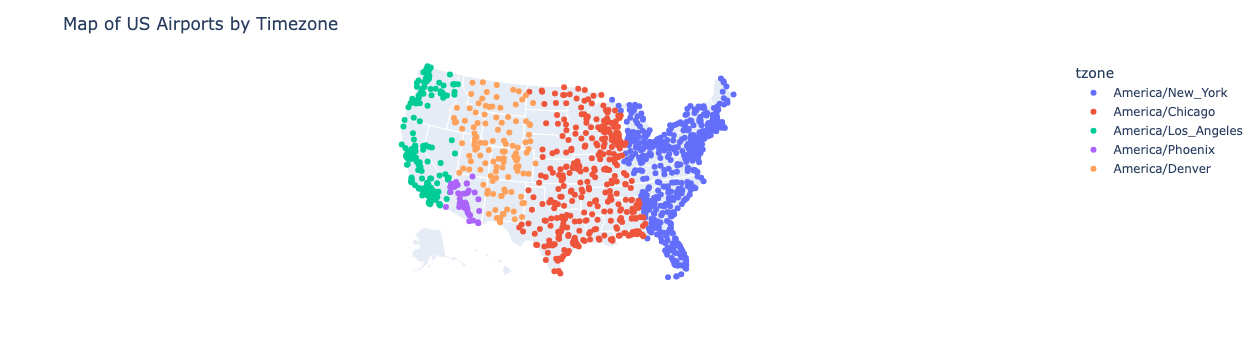

In [42]:
# Plotting the data
fig = px.scatter_geo(df_airports,
                    lat = 'lat',
                    lon = 'lon',
                    hover_name = "name",
                    color = 'tzone')
fig.update_layout(
        title = 'Map of US Airports by Timezone',
        geo_scope='usa',
    )
fig.show()

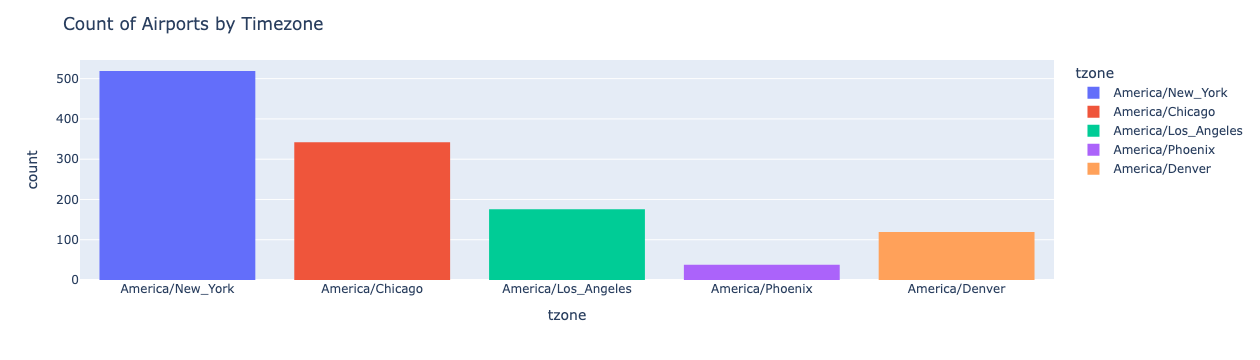

In [43]:
# Histogram of the number or airports in each timezone

fig = px.histogram(df_airports,
             x = 'tzone',
             color = 'tzone'
            )
             
fig.update_layout(
    title = 'Count of Airports by Timezone')
    
fig.show()